# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [18]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

Прочитаем исходные данные:

In [20]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

### Задание 5.0

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [26]:
display(data.info())
display(data.describe())
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


None

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


(200, 8)

### Задание 5.1

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


'Ранг матрицы корреляции равен - 8'

'Определитель матрицы корреляции равен - 0.0007299388072652082'

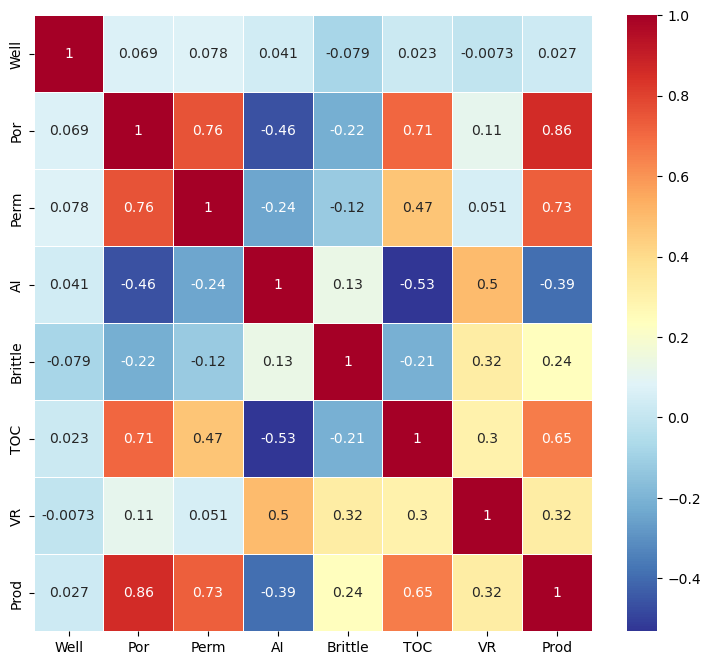

In [29]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5)

display(corr_matrix)
display(f"Ранг матрицы корреляции равен - {np.linalg.matrix_rank(corr_matrix)}")
display(f"Определитель матрицы корреляции равен - {np.linalg.det(corr_matrix)}")

> Исходя из построенной матрицы корреляции, мы можем сделать вывод о том, что такие факторы, как Por — пористость скважины, 
Perm — проницаемость скважин и TOC — общий органический углерод, наиболее коррелируют с нашим целевым признаком Prod — добыча газа в сутки.
>
> Ранг матрицы корреляций равен количеству столбцов-векторов, значит, все векторы системы линейно независимы.
> 
> Поскольку определитель матрицы корреляции равен 0.0007299388072652082, корреляционная матрица является плохо обусловенной.
> 
> Факторы Perm и Por, Por и TOC довольно сильно скоррелированы, что говорит о мультиколлинеарности признаков нашей матрицы. Так же средний уровень обратной корреляции просматривается между признаками TOC и AI.
>
> В данном случае модель классической линейной регрессии по методу наименьших квадратов плохо применима, так как матрица близка к вырожденной, а ее определитель близок к нулю, данные являются плохо обусловленными.

### Задание 5.2

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


In [33]:
# матрица наблюдений
data_ = data.drop('Prod', axis=1) # исключаем из данных целевую переменную
# вектор значения целевой переменной
y = data[["Prod"]]

X = np.column_stack((np.ones(data.shape[0]), data_))
w_hat = np.round(np.linalg.inv(X.T@X)@X.T@y, 0) # решаем уравнение линейной регрессии по МНК

display(w_hat)

,Prod
0,-1232.0
1,0.0
2,230.0
3,116.0
4,-365.0
5,25.0
6,-78.0
7,785.0


> Коэффициент свободного члена равен -1232, что говорит о воздействии внешних факторов, то есть без других факторов наших данных, добыча газа будет снижаеться по иным причинам
>
> Признаки Brittle — коэффициент хрупкости скважины, VR — коэффициент отражения витринита - имеют слабую корреляцию с нашей целевой переменной в пределах 0.3, а признак Well — идентификатор скважины - имеет коэффициент равный 0, а значит он никак не влияет на нашу целевую переменную и является дублирующим индекс нашей матрицы, добавляет шум и в дальнейшем от него стоит избавиться.
> 
> Поскольку мы строим модель линейной регрессии на нестандартизированных данных, значения коэффициентов имеют разный масштаб и получились с большим разбросом. Разница между первым и последним коэффициентом более 2000, коэффициенты 3 и 5 так же измеряются в сотнях. 
> 
> Стандартизация поможет выстроить единый масштаб оценок коэффициентов регрессии, что даст более цельную и объективную картину.

### Задание 5.3

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

In [37]:
new_factors = np.array(list({
    "1": 1,
    "Well": 106.0,
    "Por": 15.32,
    "Perm": 3.71,
    "AI": 3.29,
    "Brittle": 55.99,
    "TOC": 1.35,
    "VR": 2.42
 }.values())) # массив факторов новой скважины с добавленным интерсептом

y_base = 4748.315024 # истинное значение

new_y = np.dot(new_factors, w_hat)
err = np.round(np.abs(y_base - new_y), 6)
display(f"Прогноз добычи: {new_y[0]}")
display(f"Абсолютная ошибка: {err[0]}")
display(f"Метрика MAPE для новой скважины: {mean_absolute_percentage_error(np.array([y_base]), new_y)*100:.2f} %")

# прогноз выработки газа для всех скважин 
y_pred = X@w_hat

display(f"Метрика MAPE прогноза выработки газа для всех скважин : {mean_absolute_percentage_error(y, y_pred)*100:.2f} %")

'Прогноз добычи: 4715.26'

'Абсолютная ошибка: 33.055024'

'Метрика MAPE для новой скважины: 0.70 %'

'Метрика MAPE прогноза выработки газа для всех скважин : 3.65 %'

> Согласно расчетам метрики MAPE, наш предсказанный результат отличается от текущих реальных значений незначительно - средняя абсолютная ошибка составляет около 3.6%, что говорит о высоком качестве предсказанных значений.

### Задание 5.4

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

In [41]:
# Датасет соотношения коэффициентов линейной регрессии и коэффициентов корреляции
res_df = pd.DataFrame(corr_matrix.iloc[:-1, -1].values, columns=["corr_coefs"])
res_df["w_hat"] = w_hat[1:].values
columns = data.drop("Prod", axis=1).columns
res_df.index = columns
display(res_df)

,corr_coefs,w_hat
Well,0.026817,0.0
Por,0.861910,230.0
Perm,0.727426,116.0
AI,-0.390835,-365.0
Brittle,0.237155,25.0
TOC,0.654445,-78.0
VR,0.323182,785.0


> Как мы можем видеть из полученного датасета, в нашей модели есть фактор TOC, у которого коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции. Корреляция говорит, что зависимость между фактором и целевой переменной прямая, а коэффициент модели говорит об обратной зависимости.
> 
> Это может указывать на то, что фактор влияет на целевую переменную иначе в контексте модели и быть связано с мультиколлинеарностью и взаимодействием факторов в модели, а так же близости к вырожденности, что может искажать результаты прогнозирования. А как мы выяснили ранее, факторы Por и TOC имеют довольно сильную прямую корреляцию и факторы TOC и AI обратную корреляцию.

### Задание 5.5

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

In [45]:
# факторы TOC и Por, Por и Perm сильно скоррелированы между собой, но в обоих случаях у фактора Por корреляция с целевым признаком выше
# Оставляем только фактор Por
# Фактор Well имеет минимальную корреляцию с целевой переменной, его так же исключаем
new_data = data.copy()
new_data.drop(["Well", "Perm", "TOC", "Prod"], axis=1, inplace=True)

renew_X = np.column_stack((np.ones(data.shape[0]), new_data))
renew_w_hat = np.round(np.linalg.inv(renew_X.T@renew_X)@renew_X.T@y, 0)

print(f"Коэффициенты до удаления факторов: {w_hat}", sep='\n')
print(f"Коэффициенты после удаления факторов: {renew_w_hat}", sep='\n')

y_pred = renew_X@renew_w_hat

# Вычислим метрику MAPE
display(f"MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.2f}%")

Коэффициенты до удаления факторов:      Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0
Коэффициенты после удаления факторов:      Prod
0 -1835.0
1   293.0
2  -200.0
3    28.0
4   517.0


'MAPE: 4.05%'

> Обновленные коэффициенты притерпели значительное изменение и все так же показывают высокую прямую корреляцию с целевой переменной фактора Por, который изменился с 230 до 293, и обратную корреляцию фактора AI, который изменился с -365 до - 200. И, хоть и с заметным снижением, остается высоким коэффициент фактора VR = 517, несмотря на то, что в матрице корреляции с целевой переменной его корреляция довольно низкая. 
>
> Согласно обновленной метрики MAPE, наш предсказанный результат отличается от текущих реальных значений примерно на 4%, ранее средняя абсолютная ошибка составляла 3.6%, здесь изменения минимальны.
>
> С удалением фактора TOC было исключено противоречие между коэффициентами корреляций и коэффициентами регрессии.

### Задание 5.6

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

In [49]:
model = LinearRegression()
model = model.fit(renew_X, y)
model.coef_ = np.round(model.coef_, 0)
pred = model.predict(renew_X)

print(f"Коэффициенты после удаления факторов, полученные через numpy: {renew_w_hat}", sep='\n')
print(f"Коэффициенты после удаления факторов, полученные через sklearn: {model.coef_}")

# Вычислим метрику MAPE
display(f"MAPE: {mean_absolute_percentage_error(y, pred)*100:.2f}%")

Коэффициенты после удаления факторов, полученные через numpy:      Prod
0 -1835.0
1   293.0
2  -200.0
3    28.0
4   517.0
Коэффициенты после удаления факторов, полученные через sklearn: [[   0.  293. -200.   28.  517.]]


'MAPE: 4.05%'

> Решение с помощью библиотеки sklearn и решение через МНК с помощью библиотеки numpy дало одинаковые результаты.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [54]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV

### Задание 8.1
Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [57]:
X = data.drop(["Well", "Perm", "TOC", "Prod"], axis=1)
y = data[["Prod"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pol = PolynomialFeatures(degree=3, include_bias=False)
X_pol = pol.fit_transform(X_scaled)

display(f"Количество факторов после генерации полиномиальных признаков: {X_pol.shape[1]}")

lr = LinearRegression().fit(X_pol, y)
y_pred = lr.predict(X_pol)

scores = cross_validate(lr, X_pol, y, scoring="neg_mean_absolute_percentage_error", cv=5, return_train_score=True)
display(f"MAPE на тренировочных фолдах: {(-scores["train_score"].mean()* 100):.2f}%")
display(f"MAPE на валидационных фолдах: {(-scores["test_score"].mean()* 100):.2f}%")	

'Количество факторов после генерации полиномиальных признаков: 34'

'MAPE на тренировочных фолдах: 1.77%'

'MAPE на валидационных фолдах: 2.68%'

> Качество модели значительно возрасло, средняя абсолютная ошибка снизилась, что отражается как на тренировочных, так и на валидационных фолдах..

### Задание 8.2

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [61]:
# сетка гиперпараметров
param_dist = [{"alpha": np.linspace(0.1, 5, 100, dtype=float)}]

# создаем объект класса RandomizedSearchCV и передаем гиперпараметры
random_search_lasso = RandomizedSearchCV(
    estimator=Lasso(random_state=42),
    param_distributions=param_dist,
    cv=5,
    scoring="neg_mean_absolute_percentage_error",
    n_iter=50,
    n_jobs=-1
)  

random_search_lasso.fit(X_pol, y) 

display(f"Наилучшие значения гиперпараметров: {random_search_lasso.best_params_}")
display(f"Наилучшее значение MAPE при кросс-валидации: {-random_search_lasso.best_score_:.3f}%")

# применим найденные гиперпараметры для регрессии с L1-регуляризацией к нашим данным
lasso = Lasso(alpha=random_search_lasso.best_params_["alpha"], random_state=42)

# передаем в кросс-валидационную функцию наши данные и модель
scores_l = cross_validate(lasso, X_pol, y, scoring="neg_mean_absolute_percentage_error", cv=5, return_train_score=True)

display(f"MAPE на тренировочных фолдах: {-scores_l["train_score"].mean()*100:.2f}%")
display(f"MAPE на валидационных фолдах: {-scores_l["test_score"].mean()*100:.2f}%")	

"Наилучшие значения гиперпараметров: {'alpha': 4.604040404040404}"

'Наилучшее значение MAPE при кросс-валидации: 0.023%'

'MAPE на тренировочных фолдах: 1.82%'

'MAPE на валидационных фолдах: 2.28%'

> Исходя из метрики MAPE нам удалось еще немного улучшить качество модели, ранее было 2.68%, теперь 2.28% 

### Задание 8.3

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [65]:
# сетка гиперпараметров
param_dist = [{"alpha": np.linspace(0.01, 5, 100, dtype=float)}]

random_search_ridge = RandomizedSearchCV(
    estimator=Ridge(random_state=42),
    param_distributions=param_dist,
    cv=5,
    scoring="neg_mean_absolute_percentage_error",
    n_iter=50,
    n_jobs=-1
)  

random_search_ridge.fit(X_pol, y) 

display(f"Наилучшие значения гиперпараметров: {random_search_ridge.best_params_}")
display(f"Наилучшее значение MAPE при кросс-валидации: {-random_search_ridge.best_score_:.2%}")

# применим найденные гиперпараметры для регрессии с L2-регуляризацией к нашим данным
ridge = Ridge(alpha=random_search_ridge.best_params_["alpha"], random_state=42)

# передаем в кросс-валидационную функцию наши данные и модель
scores_r = cross_validate(ridge, X_pol, y, scoring="neg_mean_absolute_percentage_error", cv=5, return_train_score=True)

display(f"MAPE на тренировочных фолдах: {-scores_r["train_score"].mean()*100:.2f}%")
display(f"MAPE на валидационных фолдах: {-scores_r["test_score"].mean()*100:.2f}%")	

"Наилучшие значения гиперпараметров: {'alpha': 0.21161616161616165}"

'Наилучшее значение MAPE при кросс-валидации: 2.67%'

'MAPE на тренировочных фолдах: 1.77%'

'MAPE на валидационных фолдах: 2.67%'

> L2-регуляризация снизила качество - MAPE = 2.67% - нашей линейной регрессии по сравнению с L1-регуляризацией -  MAPE = 2.28%.

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [70]:
# Ваш код здесь
# сетка гиперпараметров
param_dists = [{"alpha": np.linspace(0.1, 5, 100, dtype=float),
              "l1_ratio": np.linspace(0.05, 1, 10, dtype=float)}
]

random_search_elast = RandomizedSearchCV(
    estimator=ElasticNet(random_state=42),
    param_distributions=param_dists,
    cv=5,
    scoring="neg_mean_absolute_percentage_error",
    n_iter=300,
    n_jobs=-1
)  

random_search_elast.fit(X_pol, y) 

display(f"Наилучшие значения гиперпараметров: {random_search_elast.best_params_}")
display(f"Наилучшее значение MAPE при кросс-валидации: {-random_search_elast.best_score_:.2%}")

# применим найденные гиперпараметры для регрессии с L1-регуляризации к нашим данным
elastic = ElasticNet(alpha=random_search_elast.best_params_["alpha"], l1_ratio=random_search_elast.best_params_["l1_ratio"],
                     max_iter=500, random_state=42)
# передаем в кросс-валидационную функцию наши данные и модель
scores_el = cross_validate(elastic, X_pol, y, scoring="neg_mean_absolute_percentage_error", cv=5, return_train_score=True)

display(f"MAPE на тренировочных фолдах: {-scores_el["train_score"].mean()*100:.2f}%")
display(f"MAPE на валидационных фолдах: {-scores_el["test_score"].mean()*100:.2f}%")	

"Наилучшие значения гиперпараметров: {'l1_ratio': 1.0, 'alpha': 4.901010101010101}"

'Наилучшее значение MAPE при кросс-валидации: 2.28%'

'MAPE на тренировочных фолдах: 1.83%'

'MAPE на валидационных фолдах: 2.28%'

> Модель ElasticNet дает нам тот же уровень значений метрики MAPE, что и L1-регуляризация - 2.28%

### Задание 8.5

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

In [74]:
# Ваш код здесь
# датафрейм с результатами всех построенных моделей
score_data = pd.DataFrame({
    "Наименование модели": ["LinearRegression", "Polinomial Regression", "Polinomial Regression Lasso", "Polinomial Regression Ridge", 
              "Polinomial Regression ElasticNet"],
    "Гиперпараметры": [False, False, random_search_lasso.best_params_, random_search_ridge.best_params_, 
                        random_search_elast.best_params_],
    "Полиномиальные признаки": [False, True, True, True, True],
    "MAPE на тренировочных фолдах": [mean_absolute_percentage_error(y, pred)*100,
                            -scores["train_score"].mean()*100, 
                            -scores_l["train_score"].mean()*100, 
                            -scores_r["train_score"].mean()*100, 
                            -scores_el["train_score"].mean()*100],
    "MAPE на валидационных фолдах": [None, -scores["test_score"].mean()*100, 
                            -scores_l["test_score"].mean()*100,
                              -scores_r["test_score"].mean()*100,
                               -scores_el["test_score"].mean()*100]
    })

score_data

,Наименование модели,Гиперпараметры,Полиномиальные признаки,MAPE на тренировочных фолдах,MAPE на валидационных фолдах
0,LinearRegression,False,False,4.048873,NaN
1,Polinomial Regression,False,True,1.773240,2.680875
2,Polinomial Regression Lasso,{'alpha': 4.604040404040404},True,1.821466,2.275520
3,Polinomial Regression Ridge,{'alpha': 0.21161616161616165},True,1.774251,2.672614
4,Polinomial Regression ElasticNet,"{'l1_ratio': 1.0, 'alpha': 4.901010101010101}",True,1.826169,2.275995


> На примере данного анализа мы смогли увидеть, как важно построить и проанализировать корреляции факторов между собой и целевой переменной, как мультиколлинеарность в данных может приводить к трудноинтерпретируемым результатам и большому разбросу коэффициентов. Была показана необходимость предварительной обработки данных, исключения слабокоррелирующих с целевой переменной признаков и шумов, чтобы в итоге оставить только те факторы, которые являются значимыми для целевой переменной и не будут искажат будущий прогноз модели.
> 
> Мы установили факторы, которые оказывают наибольшее влияние на добычу газа: Por - показал высокую положительную корреляцию, AI - отрицательную.
> 
> Из сравнительной таблицы мы видим, что наилучшей моделью, которая решает задачу с минимальной ошибкой, является линейная регрессия на полиномиальных признаках с L1-регуляризацией.
> 
> Итоговый результат показал отсутствие большого разброса между значениями метрик на тренировочных и валидационнных фолдах, что говорит о том, что наши модели не переобучились, но показали практически максимальную изученность данных. 